In [22]:
import pandas as pd
import sqlite3

# Load CSV with encoding fix
retail = pd.read_csv("OnlineRetail.csv", encoding="latin1")
print("First 5 rows:")
print(retail.head())

# Save to SQLite
conn = sqlite3.connect("retail.db")
retail.to_sql("Sales", conn, if_exists="replace", index=False)
conn.close()
print("Saved to retail.db")

First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
Saved to retail.db


In [24]:
# Connect and Check
import sqlite3
import pandas as pd

conn = sqlite3.connect("retail.db")
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables:", [t[0] for t in tables])
conn.close()



Tables: ['Sales']


In [26]:
# Basic Query
conn = sqlite3.connect("retail.db")
df = pd.read_sql_query("SELECT * FROM Sales LIMIT 5;", conn)
print("First 5 sales:")
display(df)
conn.close()

First 5 sales:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [31]:
# Total Sales by Country
conn = sqlite3.connect("retail.db")
df = pd.read_sql_query("""
    SELECT Country, SUM(Quantity * UnitPrice) as TotalSales
    FROM Sales
    GROUP BY Country
    ORDER BY TotalSales DESC
    LIMIT 5;
""", conn)
print("Top 5 countries by sales:")
display(df)
conn.close()

Top 5 countries by sales:


,Country,TotalSales
0,United Kingdom,8187806.364
1,Netherlands,284661.540
2,EIRE,263276.820
3,Germany,221698.210
4,France,197403.900


In [33]:
# Top Products
conn = sqlite3.connect("retail.db")
df = pd.read_sql_query("""
    SELECT Description, SUM(Quantity) as TotalQty
    FROM Sales
    GROUP BY Description
    ORDER BY TotalQty DESC
    LIMIT 5;
""", conn)
print("Top 5 products by quantity:")
display(df)
conn.close()

Top 5 products by quantity:


,Description,TotalQty
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1,JUMBO BAG RED RETROSPOT,47363
2,ASSORTED COLOUR BIRD ORNAMENT,36381
3,POPCORN HOLDER,36334
4,PACK OF 72 RETROSPOT CAKE CASES,36039


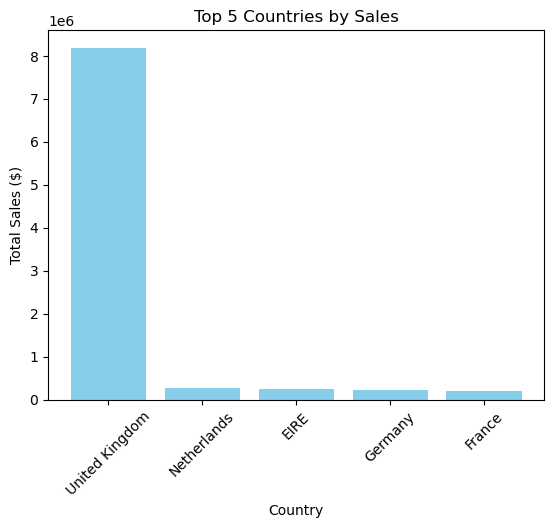

In [35]:
# Visual
import matplotlib.pyplot as plt
conn = sqlite3.connect("retail.db")
df = pd.read_sql_query("""
    SELECT Country, SUM(Quantity * UnitPrice) as TotalSales
    FROM Sales
    GROUP BY Country
    ORDER BY TotalSales DESC
    LIMIT 5;
""", conn)
plt.bar(df["Country"], df["TotalSales"], color="skyblue")
plt.title("Top 5 Countries by Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()
conn.close()

In [39]:
# Summary
print("SQL Mini-Project: Analyzed retail sales by country and product.")

SQL Mini-Project: Analyzed retail sales by country and product.
